# Chapter1 Linear Regression

## 1. Linear regression with one variable

### 1.1 plotting the data

In [2]:
# 导入基本的包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('ex1data1.txt', header=None, names=['pop', 'profit'])
data.head()

,pop,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.describe() # 数据描述

,pop,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


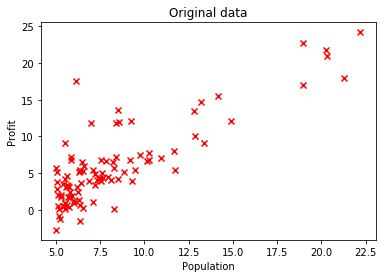

In [134]:
# 绘制
X = data.iloc[:, 0]
y = data.iloc[:, 1]
plt.scatter(X, y, c='r', marker='x')
plt.title('Original data')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()


### 1.2 gradient descent

公式：
损失函数 $J\left( \theta \right) =\dfrac {1}{2m}\sum ^{m}_{i=1}\left( h\theta \left( x^{\left( i\right) }\right) -y^{\left( i\right) }\right) $

求导：$\theta _{j}:\theta _{j}-\alpha \dfrac {1}{m}\sum ^{m}_{i=1}\left( h\theta \left( x^{\left( i\right) }\right) -y^{\left( i\right) }\right)\ast x_{j}^{\left( i\right) }$

In [155]:
# 获得X和y
def get_X(data):
    m = data.shape[0]
    X = data.iloc[:, :-1]
    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    return X

def get_y(data):
    return data.iloc[:, -1]

X = get_X(data)
y = get_y(data)

#### 计算损失函数

In [157]:
def compute_cost(X, y, theta):
    m = X.shape[0]
    error = np.dot(X, theta) - y
    square_sum = np.dot(error, error)
    cost = square_sum / (2 * m)
    return cost

#### 初始化参数

In [180]:
m, n = X.shape
alpha = 0.01
iterations = 500
theta = np.ones(n)
theta

array([ 1.,  1.])

#### 梯度下降函数

In [182]:
def gradient_descent(X, y, theta, alpha = 0.01, iter_nums = 100):
    m = X.shape[0]    
    cost_data = [] # 记录损失变化
    
    for i in range(iter_nums):
        cost_data.append(compute_cost(X, y, theta))
        error = np.dot(X, theta) - y
        error = np.dot(X.T, error) / m
        theta = theta - alpha * error
        
    
    return theta, cost_data

In [183]:
final_theta, cost = gradient_descent(X, y, theta, alpha, iterations)
final_theta

array([-1.92155972,  0.99470171])

#### 查看拟合情况

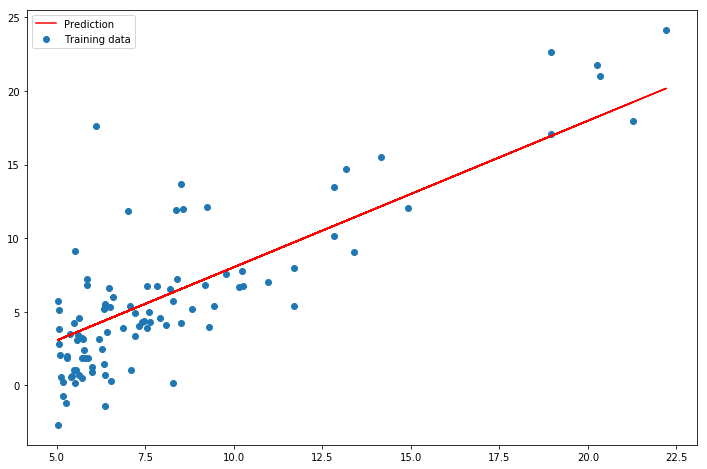

In [207]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], label='Training data')
ax.plot(data.iloc[:, 0], np.dot(X, final_theta.T), 'r', label='Prediction')
ax.legend(loc='best')
plt.show()

#### 迭代过程中cost的变化

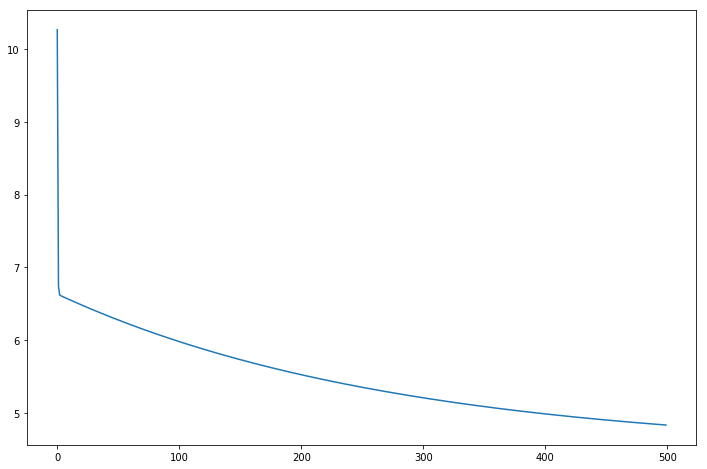

In [211]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iterations), cost)
plt.show()

## 2. Linear regression with multiple variables

### 2.1 feature normalization

> 数据的归一化可以消除不同单位和尺度的影响，使梯度下降更快的收敛

> z-scores: $z=\dfrac {x-\mu }{\sigma }$

In [213]:
data = pd.read_csv('ex1data2.txt', header=None, names=['size', 'bedrooms', 'piece'])
data.head()

,size,bedrooms,piece
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [215]:
def normalize(data):
    # 数据归一化
    return (data - data.mean()) / data.std()

In [216]:
data = normalize(data)
data.head()

,size,bedrooms,piece
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### 2.2 梯度下降

In [220]:
X = get_X(data)
y = get_y(data)
alpha = 0.01
iterations = 500
m, n = X.shape
theta = np.ones(n)

In [222]:
final_theta, cost = gradient_descent(X, y, theta, alpha, iterations)
final_theta

array([ 0.00657048,  0.83084   ,  0.0012801 ])

#### 迭代过程cost的变化

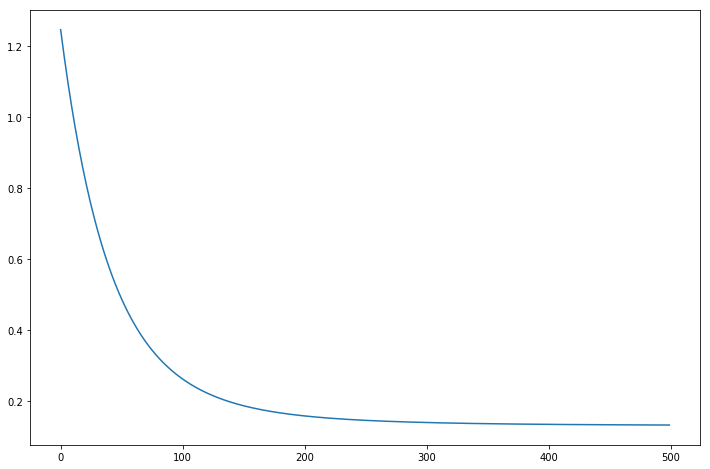

In [225]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iterations), cost)
plt.show()

## 3. Normal equations

标准数学的解法，线性代数的内容，公式如下：$\theta =\left( X^{T}X\right) ^{-1}X^{T}y$
1. 通常情况选择梯度下降，尤其是数据量很大的时候
2. normal equations不需要迭代，直接寻找最优拟合

数据初始化

In [248]:
X = np.mat(X)
y = np.mat(y).T
theta = (X.T * X).I * X.T * y
theta

matrix([[ -1.14491749e-16],
        [  8.84765988e-01],
        [ -5.31788197e-02]])